## Getting Started

In [1]:
print ("Notebook is working!")

Notebook is working!


In [2]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print ("Packages loaded successfully")

Packages loaded successfully


## Loading CSVs


In [4]:
ratings = pd.read_csv("../data/raw/ratings.csv")
diary = pd.read_csv("../data/raw/diary.csv")

ratings.head()

,Date,Name,Year,Letterboxd URI,Rating
0,2024-05-16,Parasite,2019,https://boxd.it/hTha,4.5
1,2024-05-16,Everything Everywhere All at Once,2022,https://boxd.it/jUk4,5.0
2,2024-05-16,Spider-Man: Into the Spider-Verse,2018,https://boxd.it/azpY,5.0
3,2024-05-16,Midsommar,2019,https://boxd.it/jhxe,3.5
4,2024-05-16,Saltburn,2023,https://boxd.it/z4eg,2.5


In [5]:
diary.head()

,Date,Name,Year,Letterboxd URI,Rating,Rewatch,Tags,Watched Date
0,2024-05-16,Soul,2020,https://boxd.it/6u3SED,5.0,NaN,with cousins,2024-01-12
1,2024-05-16,Taylor Swift: The Eras Tour,2023,https://boxd.it/6u3VJV,4.5,NaN,with cousins,2024-01-13
2,2024-05-16,Barbie,2023,https://boxd.it/6u3VRZ,5.0,Yes,with cousins,2024-01-14
3,2024-05-16,Elemental,2023,https://boxd.it/6u3SNv,5.0,NaN,with cousins,2024-01-15
4,2024-05-16,Saltburn,2023,https://boxd.it/6u3UTl,2.5,NaN,NaN,2024-02-19


## Data Cleaning

In [6]:
# Converting date columns to datetime

ratings['Date'] = pd.to_datetime(ratings['Date'], errors = 'coerce')
diary['Date'] = pd.to_datetime(diary['Date'], errors = 'coerce')
diary['Watched Date'] = pd.to_datetime(diary['Watched Date'], errors = 'coerce')

# Check conversion
ratings.head()

,Date,Name,Year,Letterboxd URI,Rating
0,2024-05-16,Parasite,2019,https://boxd.it/hTha,4.5
1,2024-05-16,Everything Everywhere All at Once,2022,https://boxd.it/jUk4,5.0
2,2024-05-16,Spider-Man: Into the Spider-Verse,2018,https://boxd.it/azpY,5.0
3,2024-05-16,Midsommar,2019,https://boxd.it/jhxe,3.5
4,2024-05-16,Saltburn,2023,https://boxd.it/z4eg,2.5


In [7]:
diary.head()

,Date,Name,Year,Letterboxd URI,Rating,Rewatch,Tags,Watched Date
0,2024-05-16,Soul,2020,https://boxd.it/6u3SED,5.0,NaN,with cousins,2024-01-12
1,2024-05-16,Taylor Swift: The Eras Tour,2023,https://boxd.it/6u3VJV,4.5,NaN,with cousins,2024-01-13
2,2024-05-16,Barbie,2023,https://boxd.it/6u3VRZ,5.0,Yes,with cousins,2024-01-14
3,2024-05-16,Elemental,2023,https://boxd.it/6u3SNv,5.0,NaN,with cousins,2024-01-15
4,2024-05-16,Saltburn,2023,https://boxd.it/6u3UTl,2.5,NaN,NaN,2024-02-19


## Visualization

### 1) Letterboxd Rating Curve

In [8]:
# Make column names lowercase and remove spaces
ratings.columns = ratings.columns.str.strip().str.lower()
diary.columns = diary.columns.str.strip().str.lower()

# Check columns again
print(ratings.columns)

Index(['date', 'name', 'year', 'letterboxd uri', 'rating'], dtype='object')


In [9]:
ratings.head()

,date,name,year,letterboxd uri,rating
0,2024-05-16,Parasite,2019,https://boxd.it/hTha,4.5
1,2024-05-16,Everything Everywhere All at Once,2022,https://boxd.it/jUk4,5.0
2,2024-05-16,Spider-Man: Into the Spider-Verse,2018,https://boxd.it/azpY,5.0
3,2024-05-16,Midsommar,2019,https://boxd.it/jhxe,3.5
4,2024-05-16,Saltburn,2023,https://boxd.it/z4eg,2.5


C:\Users\Acer\AppData\Local\Temp\ipykernel_6760\2394584938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


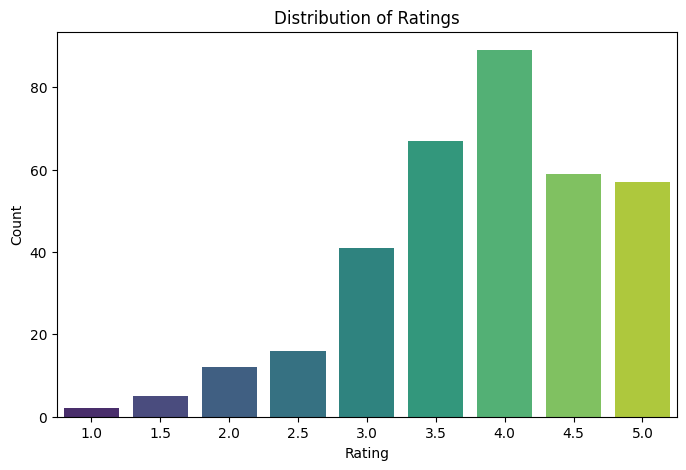

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### 2) Movies Watched According to Year

In [11]:
ratings['year'].head()

0    2019
1    2022
2    2018
3    2019
4    2023
Name: year, dtype: int64

In [12]:
ratings['year'] = pd.to_numeric(ratings['year'], errors='coerce')

In [13]:
movies_per_year = ratings['year'].value_counts().sort_index()
movies_per_year.head()

year
1960    1
1965    1
1986    1
1988    2
1989    4
Name: count, dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_6760\3725207978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_year.index, y=movies_per_year.values, palette='coolwarm')


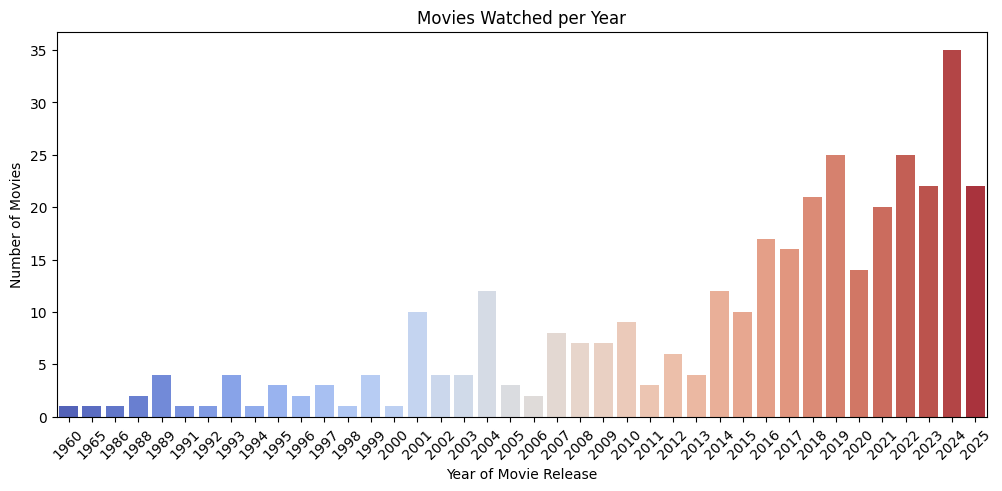

In [14]:
#using bar plot

plt.figure(figsize=(12,5))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, palette='coolwarm')
plt.xticks(rotation=45)  # rotate x-axis labels if needed
plt.title("Movies Watched per Year")
plt.xlabel("Year of Movie Release")
plt.ylabel("Number of Movies")
plt.show()

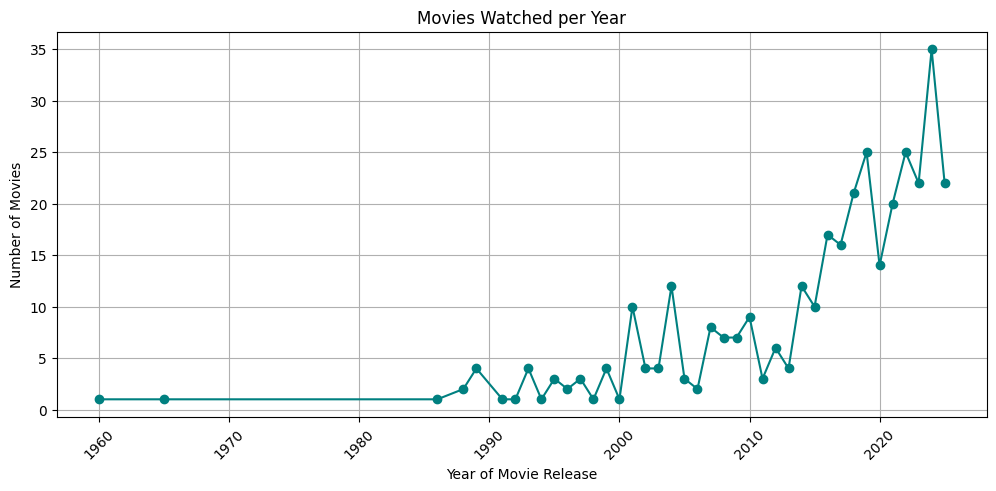

In [15]:
# Using a line plot

plt.figure(figsize=(12,5))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='teal')
plt.xticks(rotation=45)
plt.title("Movies Watched per Year")
plt.xlabel("Year of Movie Release")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

### 3) Rating Distribution

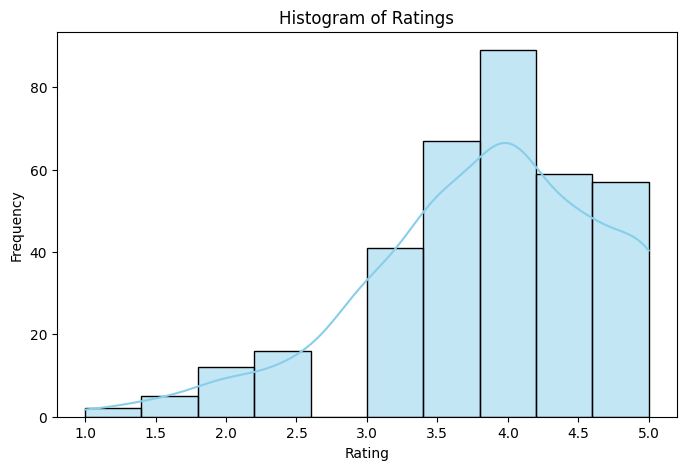

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=10, kde=True, color='skyblue')
plt.title("Histogram of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### (4) Highest Rated Films

C:\Users\Acer\AppData\Local\Temp\ipykernel_6760\1329392989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies['rating'], y=top_movies['name'], palette='magma')


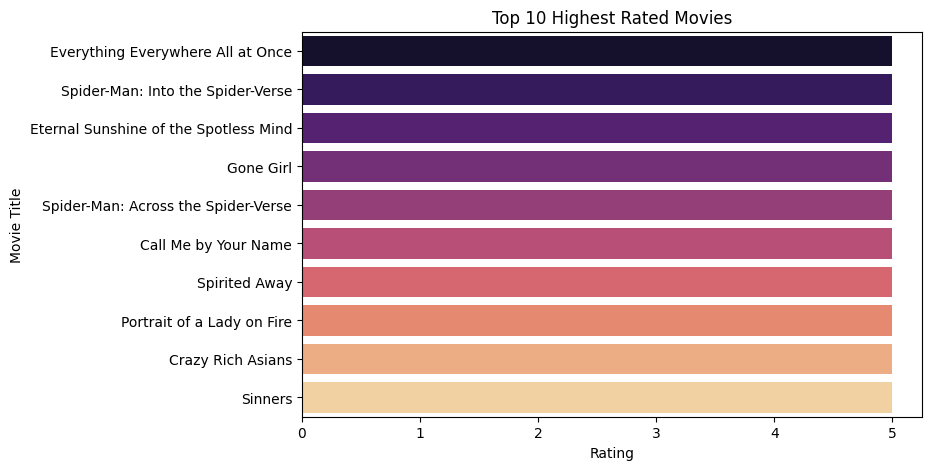

In [31]:
top_movies = ratings.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_movies['rating'], y=top_movies['name'], palette='magma')
plt.title("Top 10 Highest Rated Movies")
plt.xlabel("Rating")
plt.ylabel("Movie Title")
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_6760\1140162755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lowest_movies['rating'], y=lowest_movies['name'], palette='coolwarm')


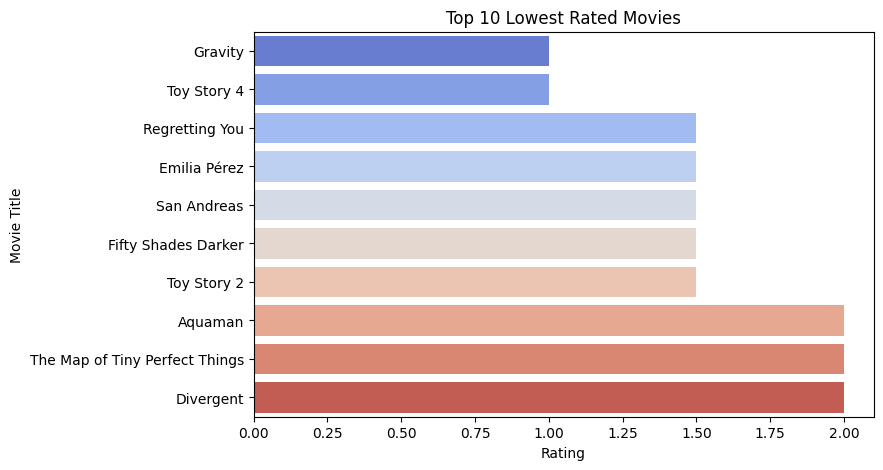

In [33]:
rated_movies = ratings.dropna(subset=['rating'])

lowest_movies = rated_movies.sort_values(by='rating', ascending=True).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=lowest_movies['rating'], y=lowest_movies['name'], palette='coolwarm')
plt.title("Top 10 Lowest Rated Movies")
plt.xlabel("Rating")
plt.ylabel("Movie Title")
plt.show()


### (5) Top Tags

C:\Users\Acer\AppData\Local\Temp\ipykernel_6760\2897098860.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')


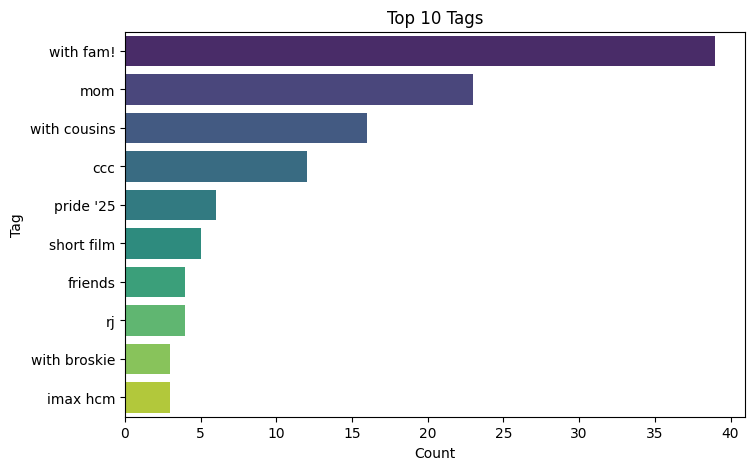

In [34]:
# Split tags by comma and explode
diary_tags = diary.dropna(subset=['tags'])
diary_tags = diary_tags.assign(tag=diary_tags['tags'].str.split(',')).explode('tag')
diary_tags['tag'] = diary_tags['tag'].str.strip()

# Top 10 tags
top_tags = diary_tags['tag'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')
plt.title("Top 10 Tags")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()
